In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
import keras
from keras import layers
from keras.datasets import mnist

### Loading the MNIST Dataset

In [75]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [76]:
x_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [77]:
x_train.shape

(60000, 28, 28)

In [78]:
# Normalization of input

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [79]:
x_train[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [80]:
x_train.shape

(60000, 28, 28)

In [81]:
# Reshaping the images to 1D vectors

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [82]:
x_train[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [83]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [84]:
y_train.shape, y_test.shape

((60000,), (10000,))

#### AutoEncoder Model

In [20]:
# AutoEncoder model - Functional API

# Input layer
input_img = keras.Input(shape=(784,))

# Encoding
encoded1 = layers.Dense(128, activation='relu')(input_img)
encoded2 = layers.Dense(64, activation='relu')(encoded1)

# Bottleneck layer
encoded3 = layers.Dense(32, activation='relu')(encoded2)

# Decoding
decoded1 = layers.Dense(64, activation='relu')(encoded3)
decoded2 = layers.Dense(128, activation='relu')(decoded1)

# Output
output_decoded = layers.Dense(784, activation='sigmoid')(decoded2)


In [21]:
autoencoder = keras.Model(input_img, output_decoded)

In [22]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [23]:
autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy')

In [24]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 5s 14ms/step - loss: 0.2426 - val_loss: 0.1660
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1504 - val_loss: 0.1371
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1312 - val_loss: 0.1249
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1230 - val_loss: 0.1195
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1177 - val_loss: 0.1138
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1129 - val_loss: 0.1092
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1088 - val_loss: 0.1056
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1055 - val_loss: 0.1028
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1030 - val_loss: 0.1011
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1011 - val_lo

#### Visualize the outputs

313/313 [==============================] - 1s 2ms/step


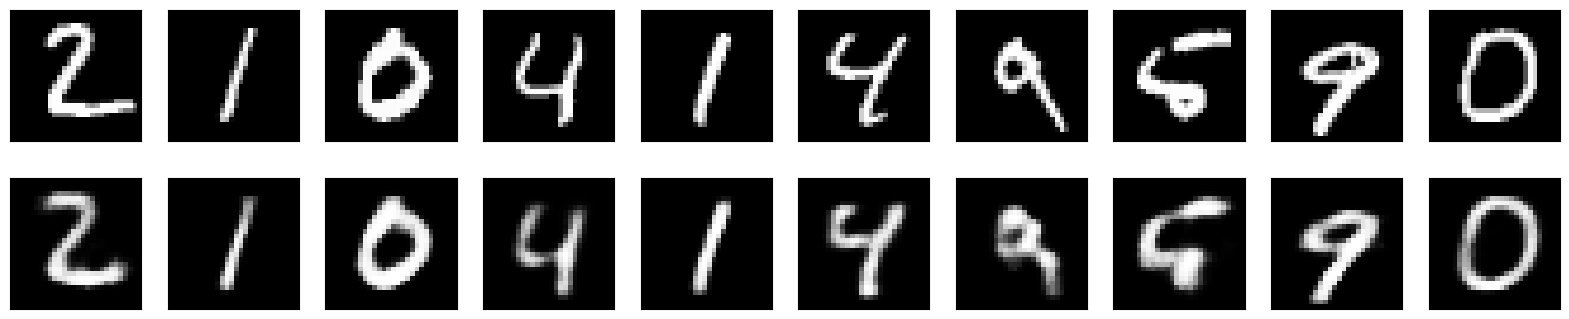

In [25]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<hr>

### Recommendation System using AE

In [28]:
movies = pd.read_csv('movies.csv')

In [29]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
movies.shape

(10329, 3)

In [30]:
ratings = pd.read_csv('ratings.csv')

In [31]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [34]:
ratings.shape

(105339, 4)

#### Creating a user-item iteraction matrix where:
- Each row represents the user
- Columns represents the movie ratings by user
- This iteraction matrix is sparse

In [71]:
rm = ratings.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
rm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [72]:
rm.shape

(10325, 668)

- use these item vectors (movie ratings) as an input to AE to learn a dense embeddings
- use these embeddings to find similar movies

In [73]:
from sklearn.model_selection import train_test_split

In [39]:
train_data, val_data = train_test_split(rm, test_size = 0.2, random_state=0)

In [40]:
train_data.shape

(8260, 668)

In [41]:
val_data.shape

(2065, 668)

**AutoEncoder Model**

In [42]:
# Input Layer
input_movie = keras.Input(shape=(668,))

# Encoding
encoded1 = layers.Dense(512, activation='relu')(input_movie)
encoded2 = layers.Dense(256, activation='relu')(encoded1)

# Bottleneck Layer
encoded3 = layers.Dense(128, activation='relu')(encoded2)

# Decoding
decoded1 = layers.Dense(256, activation='relu')(encoded3)
decoded2 = layers.Dense(512, activation='relu')(decoded1)

# Output Layer
output_decoded = layers.Dense(668, activation='linear')(decoded2)

In [43]:
autoencoder = keras.Model(input_movie, output_decoded)

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')

In [44]:
autoencoder.fit(train_data, train_data,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(val_data, val_data))

Epoch 1/10
33/33 [==============================] - 3s 44ms/step - loss: 0.1724 - val_loss: 0.1496
Epoch 2/10
33/33 [==============================] - 2s 47ms/step - loss: 0.1484 - val_loss: 0.1330
Epoch 3/10
33/33 [==============================] - 2s 49ms/step - loss: 0.1342 - val_loss: 0.1241
Epoch 4/10
33/33 [==============================] - 1s 44ms/step - loss: 0.1245 - val_loss: 0.1184
Epoch 5/10
33/33 [==============================] - 1s 37ms/step - loss: 0.1171 - val_loss: 0.1129
Epoch 6/10
33/33 [==============================] - 1s 40ms/step - loss: 0.1099 - val_loss: 0.1089
Epoch 7/10
33/33 [==============================] - 1s 37ms/step - loss: 0.1041 - val_loss: 0.1059
Epoch 8/10
33/33 [==============================] - 1s 37ms/step - loss: 0.0993 - val_loss: 0.1033
Epoch 9/10
33/33 [==============================] - 1s 38ms/step - loss: 0.0963 - val_loss: 0.1008
Epoch 10/10
33/33 [==============================] - 2s 51ms/step - loss: 0.0922 - val_loss: 0.0991


In [45]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 668)]             0         
                                                                 
 dense_6 (Dense)             (None, 512)               342528    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 668)               3426

In [46]:
autoencoder.layers

In [47]:
autoencoder.layers[3].output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_8')>

In [48]:
autoencoder.input

<KerasTensor: shape=(None, 668) dtype=float32 (created by layer 'input_2')>

Layer number 4 returns the latent space emebddings. Let's create a model with input as model input and
output as layer 4 output

In [49]:
intermediate_model = keras.Model(autoencoder.input, autoencoder.layers[3].output)

Predicting embeddings for all movies

In [50]:
embeddings = intermediate_model.predict(rm.values)

323/323 [==============================] - 1s 3ms/step


In [51]:
embeddings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.8193123 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.5940466 ],
       ...,
       [0.        , 0.45088285, 0.        , ..., 0.        , 0.        ,
        0.66704947],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.0435795 ],
       [0.        , 0.6041781 , 0.        , ..., 0.        , 0.        ,
        0.88007325]], dtype=float32)

In [60]:
embeddings.shape

(10325, 128)

Finding similar movies using cosine similarity

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
similarity_matrix = cosine_similarity(embeddings)

In [63]:
similarity_matrix.shape

(10325, 10325)

Creating an Item-Item Similarity Matrix

In [64]:
item_sim_matrix = pd.DataFrame(similarity_matrix, index=rm.index, columns=rm.index)
item_sim_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.714028,0.736896,0.542581,0.712317,0.670496,0.658021,0.603213,0.625018,0.637886,...,0.528715,0.426004,0.456706,0.433040,0.489409,0.524650,0.529236,0.427663,0.497029,0.424688
2,0.714028,1.000000,0.689328,0.716729,0.710566,0.737752,0.729529,0.735506,0.624640,0.827560,...,0.587612,0.647083,0.643744,0.655272,0.628858,0.564322,0.570149,0.648975,0.663714,0.645593
3,0.736896,0.689328,1.000000,0.722049,0.886199,0.734607,0.803431,0.751936,0.802492,0.638401,...,0.499967,0.517638,0.540817,0.516692,0.523667,0.501639,0.499927,0.517463,0.581531,0.517736
4,0.542581,0.716729,0.722049,1.000000,0.682362,0.739619,0.734447,0.814832,0.714632,0.710570,...,0.656374,0.678699,0.698111,0.682624,0.684883,0.626131,0.628695,0.679696,0.687417,0.677916
5,0.712317,0.710566,0.886199,0.682362,1.000000,0.673494,0.873929,0.746572,0.687457,0.575585,...,0.492587,0.509226,0.528676,0.510624,0.504820,0.475755,0.475684,0.509549,0.570064,0.508982


Take a random movie at index 1485 and finding top 10 similar movies 

In [67]:
item_sim_matrix[1485].sort_values(ascending=False).head(10)

movieId
1485    1.000000
1517    0.913099
2321    0.906077
1407    0.904971
1391    0.903956
1722    0.901690
1608    0.900118
1380    0.894486
1393    0.894161
216     0.890514
Name: 1485, dtype: float32

In [68]:
movie_index = item_sim_matrix[1485].sort_values(ascending=False).head(10).index

In [69]:
movie_index

Index([1485, 1517, 2321, 1407, 1391, 1722, 1608, 1380, 1393, 216], dtype='int64', name='movieId')

In [70]:
movies[movies.movieId.isin(movie_index)]

,movieId,title,genres
188,216,Billy Madison (1995),Comedy
1121,1380,Grease (1978),Comedy|Musical|Romance
1130,1391,Mars Attacks! (1996),Action|Comedy|Sci-Fi
1132,1393,Jerry Maguire (1996),Drama|Romance
1143,1407,Scream (1996),Comedy|Horror|Mystery|Thriller
1202,1485,Liar Liar (1997),Comedy
1225,1517,Austin Powers: International Man of Mystery (1...,Action|Adventure|Comedy
1287,1608,Air Force One (1997),Action|Thriller
1368,1722,Tomorrow Never Dies (1997),Action|Adventure|Thriller
1835,2321,Pleasantville (1998),Comedy|Drama|Fantasy
